<a href="https://colab.research.google.com/github/malh718/datasci_6_regression/blob/main/wineanalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
!pip install ucimlrepo


In [5]:
import pandas as pd
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

from statsmodels.stats.diagnostic import linear_rainbow
from scipy.stats import shapiro
from statsmodels.stats.diagnostic import het_goldfeldquandt


In [6]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
wine = fetch_ucirepo(id=109)


In [7]:

# data (as pandas dataframes)
df = wine.data.features
df



,Alcohol,Malicacid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,0D280_0D315_of_diluted_wines,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [8]:
df.describe()

,Alcohol,Malicacid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,0D280_0D315_of_diluted_wines,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


# Multiple Linear Regression

In [9]:
listofpredictors= df[['Alcohol','Malicacid','Magnesium','Proanthocyanins','Color_intensity']]
listofpredictors

,Alcohol,Malicacid,Magnesium,Proanthocyanins,Color_intensity
0,14.23,1.71,127,2.29,5.64
1,13.20,1.78,100,1.28,4.38
2,13.16,2.36,101,2.81,5.68
3,14.37,1.95,113,2.18,7.80
4,13.24,2.59,118,1.82,4.32
...,...,...,...,...,...
173,13.71,5.65,95,1.06,7.70
174,13.40,3.91,102,1.41,7.30
175,13.27,4.28,120,1.35,10.20
176,13.17,2.59,120,1.46,9.30


In [41]:
# Fit the regression model
X = sm.add_constant(listofpredictors)  # Adds a constant term to the predictor
print(X)
model = sm.OLS(df['Flavanoids'], X)
print(model)


     const  Alcohol  Malicacid  Magnesium  Proanthocyanins  Color_intensity
0      1.0    14.23       1.71        127             2.29             5.64
1      1.0    13.20       1.78        100             1.28             4.38
2      1.0    13.16       2.36        101             2.81             5.68
3      1.0    14.37       1.95        113             2.18             7.80
4      1.0    13.24       2.59        118             1.82             4.32
..     ...      ...        ...        ...              ...              ...
173    1.0    13.71       5.65         95             1.06             7.70
174    1.0    13.40       3.91        102             1.41             7.30
175    1.0    13.27       4.28        120             1.35            10.20
176    1.0    13.17       2.59        120             1.46             9.30
177    1.0    14.13       4.10         96             1.35             9.20

[178 rows x 6 columns]


In [42]:
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:             Flavanoids   R-squared:                       0.588
Model:                            OLS   Adj. R-squared:                  0.576
Method:                 Least Squares   F-statistic:                     49.10
Date:                Fri, 10 Nov 2023   Prob (F-statistic):           2.11e-31
Time:                        22:53:41   Log-Likelihood:                -172.94
No. Observations:                 178   AIC:                             357.9
Df Residuals:                     172   BIC:                             377.0
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -3.8471      0.899     

In [43]:
residuals = results.resid
fitted = results.fittedvalues


In [44]:

##Checking assumptions
stat, p_value = linear_rainbow(results)
print(f"Rainbow Test: stat={stat}, p-value={p_value}")

Rainbow Test: stat=1.893714151703762, p-value=0.001790364287723384


What this means is that the p value is low and this has failed.

In [45]:

### Assessing normality of the residuals
W, p_value = shapiro(residuals)
print(f"Shapiro-Wilk Test: W={W}, p-value={p_value}")


Shapiro-Wilk Test: W=0.9577372074127197, p-value=3.4421846066834405e-05


The W IS .957 and the p value is very small, 3.44e-05. This proves there is not a normal distribution of residuals.

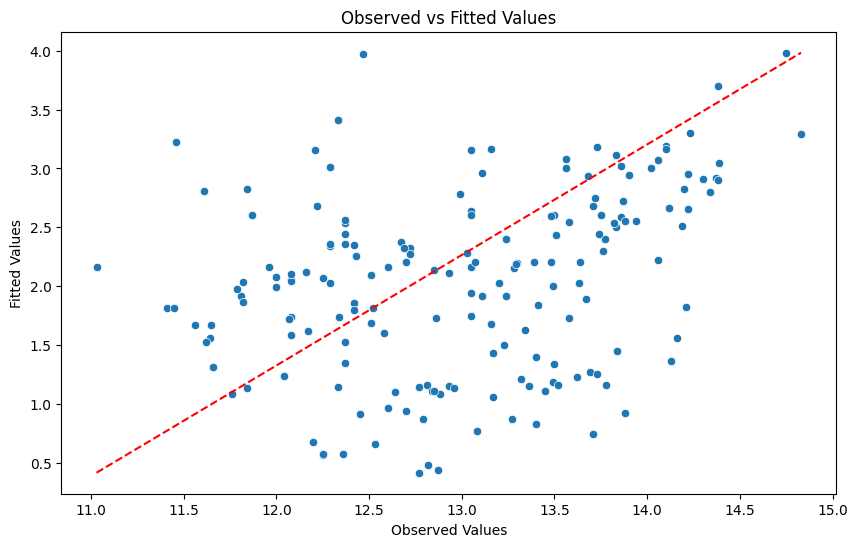

In [50]:

## A significant p-value indicates that the relationship is not linear.
# Plot observed vs fitted values
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['Alcohol'], y=fitted)
plt.xlabel('Observed Values')
plt.ylabel('Fitted Values')
plt.title('Observed vs Fitted Values')
plt.plot([min(df['Alcohol']), max(df['Alcohol'])], [min(fitted), max(fitted)], color='red', linestyle='--')
plt.show()


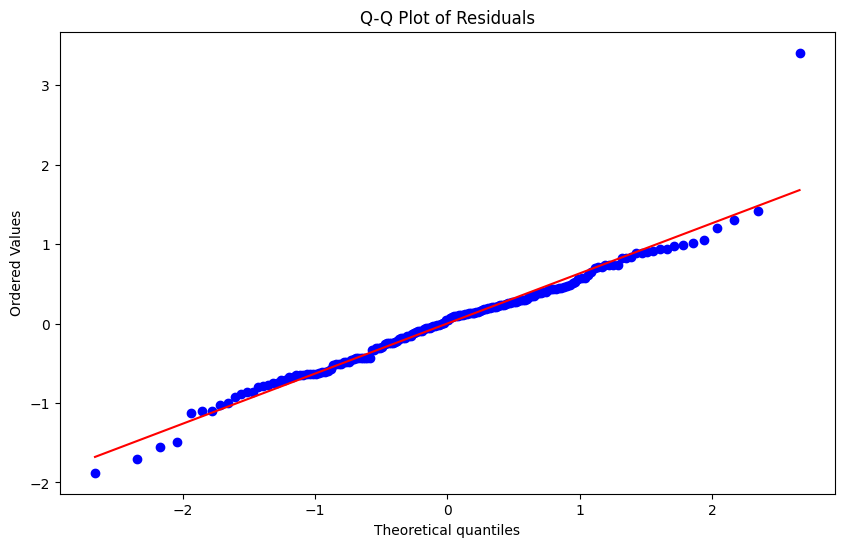

In [48]:
# Plot Q-Q plot of residuals
plt.figure(figsize=(10, 6))
stats.probplot(residuals, plot=plt)
plt.title('Q-Q Plot of Residuals')
plt.show()



In [46]:
##### Assessing the homogeneity of variance of the residuals
gq_test = het_goldfeldquandt(residuals, results.model.exog)
print(f"Goldfeld-Quandt Test: F-statistic={gq_test[0]}, p-value={gq_test[1]}")


Goldfeld-Quandt Test: F-statistic=2.630372148018502, p-value=8.122018172258795e-06


The F statisitc is 2.63. P value 8.11e-06. This value is very small and we can reject the null.

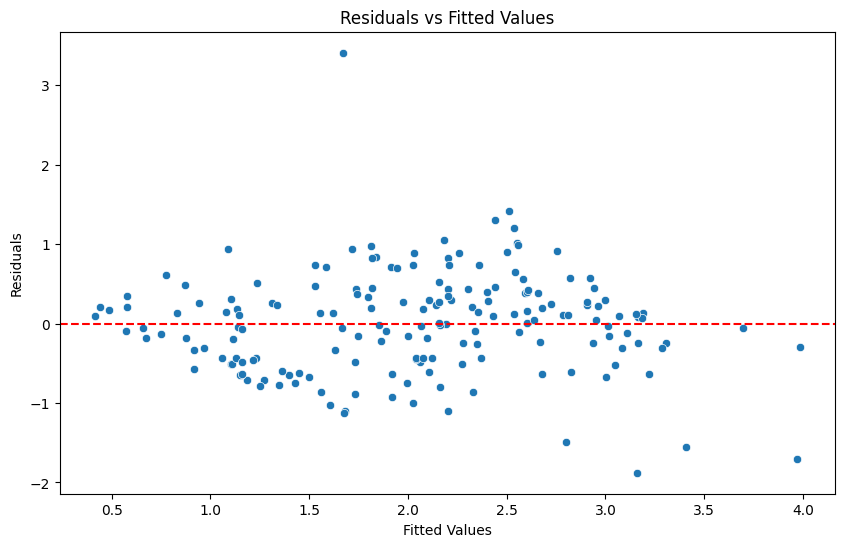

In [47]:
# Plot residuals vs fitted values
plt.figure(figsize=(10, 6))
sns.scatterplot(x=fitted, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted Values')
plt.show()

# Linear regression

In [23]:
# Fit the regression model
X = sm.add_constant(df['Alcohol'])  # Adds a constant term to the predictor
print(X)
model = sm.OLS(df['Flavanoids'], X)
print(model)


     const  Alcohol
0      1.0    14.23
1      1.0    13.20
2      1.0    13.16
3      1.0    14.37
4      1.0    13.24
..     ...      ...
173    1.0    13.71
174    1.0    13.40
175    1.0    13.27
176    1.0    13.17
177    1.0    14.13

[178 rows x 2 columns]


In [24]:
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:             Flavanoids   R-squared:                       0.056
Model:                            OLS   Adj. R-squared:                  0.051
Method:                 Least Squares   F-statistic:                     10.46
Date:                Fri, 10 Nov 2023   Prob (F-statistic):            0.00146
Time:                        22:16:53   Log-Likelihood:                -246.73
No. Observations:                 178   AIC:                             497.5
Df Residuals:                     176   BIC:                             503.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.7588      1.174     -1.498      0.1

In [25]:
residuals = results.resid
residuals

0      0.672521
1      0.672636
2      1.164291
3      1.061729
4      0.590981
         ...   
173   -1.625965
174   -1.395639
175   -1.417760
176   -1.398623
177   -1.598342
Length: 178, dtype: float64

In [26]:
fitted = results.fittedvalues
fitted

0      2.387479
1      2.087364
2      2.075709
3      2.428271
4      2.099019
         ...   
173    2.235965
174    2.145639
175    2.107760
176    2.078623
177    2.358342
Length: 178, dtype: float64

In [27]:
### Assessing linearity of the relationship
stat, p_value = linear_rainbow(results)
print(f"Rainbow Test: stat={stat}, p-value={p_value}")

Rainbow Test: stat=2.3899371469856194, p-value=3.0882100589536056e-05


P value is very small, and is under .05. What this is telling us is there is a non linear relationship between alcohol and flavinoids. So this failed.

<function matplotlib.pyplot.show(close=None, block=None)>

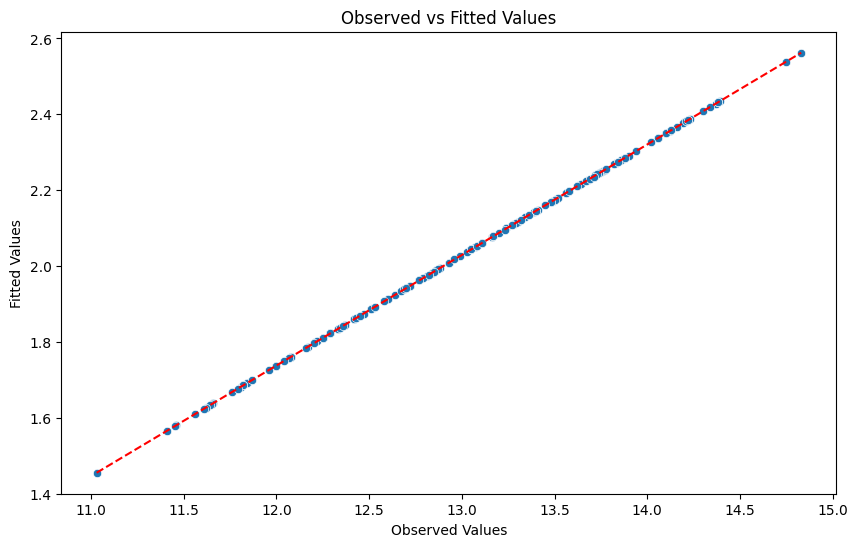

In [28]:
## A significant p-value indicates that the relationship is not linear.
# Plot observed vs fitted values
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['Alcohol'], y=fitted)
plt.xlabel('Observed Values')
plt.ylabel('Fitted Values')
plt.title('Observed vs Fitted Values')
plt.plot([min(df['Alcohol']), max(df['Alcohol'])], [min(fitted), max(fitted)], color='red', linestyle='--')
plt.show

In [29]:
### Assessing normality of the residuals
W, p_value = shapiro(residuals)
print(f"Shapiro-Wilk Test: W={W}, p-value={p_value}")

Shapiro-Wilk Test: W=0.9456958174705505, p-value=2.636219278429053e-06


There is not a normal distribution of residuals. The P value is is small. Since the p value is  2.63xe-6, we know that residuals are not distributed properly.

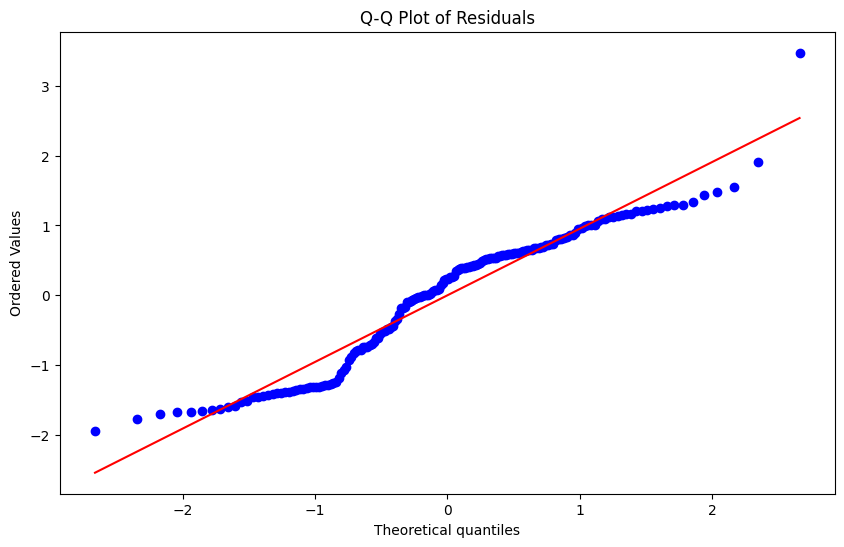

In [30]:
# Plot Q-Q plot of residuals
plt.figure(figsize=(10, 6))
stats.probplot(residuals, plot=plt)
plt.title('Q-Q Plot of Residuals')
plt.show()



In [31]:
##### Assessing the homogeneity of variance of the residuals
gq_test = het_goldfeldquandt(residuals, results.model.exog)
print(f"Goldfeld-Quandt Test: F-statistic={gq_test[0]}, p-value={gq_test[1]}")


Goldfeld-Quandt Test: F-statistic=1.9995164818409268, p-value=0.0007090877682898954


The F statistic is 1.99995.
The homogenity assumption has not been met the p value is .0007.So we have to reject the null hypothesis.


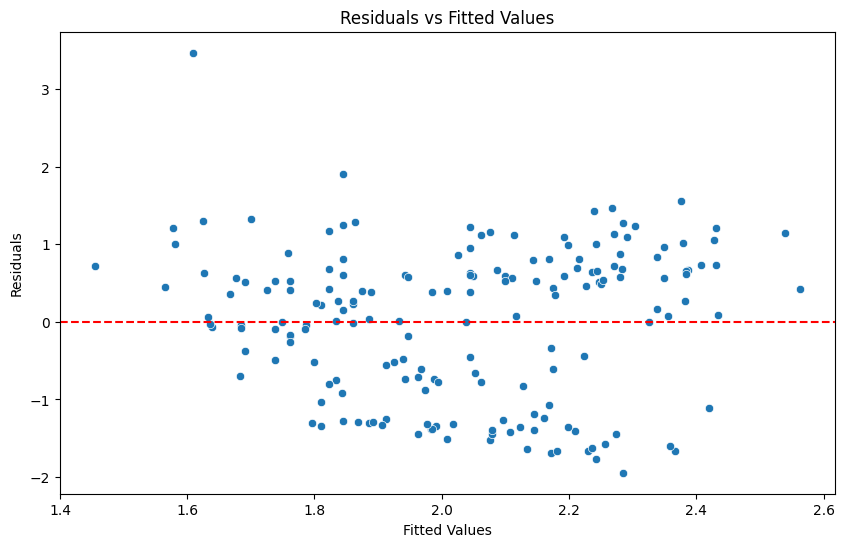

In [38]:
# Plot residuals vs fitted values
plt.figure(figsize=(10, 6))
sns.scatterplot(x=fitted, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted Values')
plt.show()